$$A=UΣV^\text{T}$$

In [1]:
import numpy as np

In [2]:
A = np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
print('DTM shape : ', np.shape(A))

DTM shape :  (4, 9)


In [3]:
U, S, Vt = np.linalg.svd(A, full_matrices = True)

In [4]:
print(U.round(2))

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


In [5]:
print(S.round(2))

[2.69 2.05 1.73 0.77]


In [6]:
print(Vt.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [7]:
print(np.shape(U), np.shape(S), np.shape(Vt))

(4, 4) (4,) (9, 9)


In [8]:
s = np.zeros((4, 9))

s[:4, :4] = np.diag(S)

In [9]:
print(s.round(2))

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


In [10]:
print(np.shape(s))

(4, 9)


In [11]:
np.allclose(A, np.dot(np.dot(U, s), Vt).round(2))

True

In [12]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [15]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [16]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [17]:
news_df = pd.DataFrame({'document':documents})

news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ') # 특수문자 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) # 짧은 단어 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower()) # 소문자 변환

In [18]:
news_df['clean_doc'][0]

'well sure about story seem biased. what disagree with your statement that u.s. media ruin israels reputation. that rediculous. u.s. media most pro-israeli media world. having lived europe realize that incidences such described letter have occured. u.s. media whole seem ignore them. u.s. subsidizing israels existance europeans least same degree). think that might reason they report more clearly atrocities. what shame that austria, daily reports inhuman acts commited israeli soldiers blessing received from government makes some holocaust guilt away. after all, look jews treating other races when they power. unfortunate.'

In [19]:
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [20]:
print(tokenized_doc[0])

['well', 'sure', 'story', 'seem', 'biased.', 'disagree', 'statement', 'u.s.', 'media', 'ruin', 'israels', 'reputation.', 'rediculous.', 'u.s.', 'media', 'pro-israeli', 'media', 'world.', 'lived', 'europe', 'realize', 'incidences', 'described', 'letter', 'occured.', 'u.s.', 'media', 'whole', 'seem', 'ignore', 'them.', 'u.s.', 'subsidizing', 'israels', 'existance', 'europeans', 'least', 'degree).', 'think', 'might', 'reason', 'report', 'clearly', 'atrocities.', 'shame', 'austria,', 'daily', 'reports', 'inhuman', 'acts', 'commited', 'israeli', 'soldiers', 'blessing', 'received', 'government', 'makes', 'holocaust', 'guilt', 'away.', 'all,', 'look', 'jews', 'treating', 'races', 'power.', 'unfortunate.']


In [21]:
detokenized_doc = []

for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [22]:
news_df['clean_doc'][0]

'well sure story seem biased. disagree statement u.s. media ruin israels reputation. rediculous. u.s. media pro-israeli media world. lived europe realize incidences described letter occured. u.s. media whole seem ignore them. u.s. subsidizing israels existance europeans least degree). think might reason report clearly atrocities. shame austria, daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away. all, look jews treating races power. unfortunate.'

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

print('TF-IDF 행렬의 크기 : ', X.shape)

TF-IDF 행렬의 크기 :  (11314, 1000)


In [24]:
# TruncatedSVD : 차원 축소(특이값 분해)
# n_components : 축소할 차원 수, algorithm : SVD 계산, n_iter : 알고리즘 반복 횟수
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [25]:
np.shape(svd_model.components_)

(20, 1000)

In [26]:
terms = vectorizer.get_feature_names_out()

In [27]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print('Topic %d : '%(idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1 : -1]])

In [28]:
get_topics(svd_model.components_, terms)

Topic 1 :  [('like', 0.21), ('know', 0.2), ('people', 0.19), ('think', 0.18), ('good', 0.15)]
Topic 2 :  [('thanks', 0.31), ('windows', 0.28), ('card', 0.17), ('drive', 0.16), ('mail', 0.15)]
Topic 3 :  [('game', 0.37), ('team', 0.31), ('year', 0.28), ('games', 0.23), ('season', 0.17)]
Topic 4 :  [('edu', 0.5), ('thanks', 0.25), ('mail', 0.18), ('com', 0.11), ('email', 0.11)]
Topic 5 :  [('edu', 0.5), ('drive', 0.25), ('com', 0.11), ('sale', 0.11), ('soon', 0.09)]
Topic 6 :  [('drive', 0.4), ('thanks', 0.35), ('know', 0.28), ('scsi', 0.14), ('mail', 0.11)]
Topic 7 :  [('chip', 0.22), ('government', 0.2), ('like', 0.17), ('encryption', 0.15), ('clipper', 0.14)]
Topic 8 :  [('like', 0.65), ('edu', 0.31), ('bike', 0.13), ('know', 0.12), ('think', 0.12)]
Topic 9 :  [('card', 0.36), ('sale', 0.18), ('00', 0.17), ('video', 0.17), ('good', 0.16)]
Topic 10 :  [('card', 0.45), ('people', 0.35), ('know', 0.26), ('video', 0.2), ('edu', 0.18)]
Topic 11 :  [('like', 0.54), ('people', 0.29), ('windo

In [29]:
import gensim
from gensim import corpora

In [30]:
len(documents)

11314

In [31]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased., disagree, s...
1    [yeah,, expect, people, read, faq,, etc., actu...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal,,...
4    [well,, change, scoring, playoff, pool., unfor...
Name: clean_doc, dtype: object

In [32]:
# gensim 라이브러리 corpora 모듈 : 문서의 단어 빈도를 기반으로 고유한 인덱스를 생성한다.
dictionary = corpora.Dictionary(tokenized_doc) # 딕셔너리 객체 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_doc] #bag-of-words 형식으로 변환(단어 인덱스, 빈도수를 기준으로 변환)

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 1), (57, 1), (58, 1)]


In [33]:
print(dictionary[0])

acts


In [34]:
NUM_TOPICS = 20 # LDA의 특징 : 주제 수를 미리 지정해야 한다.(단점이자 특징)

# LDA 모델 생성
# corpus : bow 형식 문서 리스트, id2word : 매핑된 사전, posses : 몇 번 반복학습할지 설정
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word = dictionary, passes=15)

# 모델에서 각 주제에 대해 중요한 단어를 추출(num_words : 몇 개 추출할지)
topics = ldamodel.print_topics(num_words=4)

for topic in topics:
    print(topic) # 토픽에 대한 기여도와 중요한 단어들 출력

(0, '0.013*"people" + 0.007*"jesus" + 0.006*"armenian" + 0.006*"believe"')
(1, '0.007*"scsi-2" + 0.006*"scsi-1" + 0.005*"allocation" + 0.004*"symbol"')
(2, '0.007*"radar" + 0.007*"smokeless" + 0.004*"detector" + 0.004*"copies)"')
(3, '0.027*"----------------------------------------------------------------------" + 0.019*"subject:" + 0.012*"file:" + 0.007*"xterm"')
(4, '0.015*"----" + 0.007*"candida" + 0.003*"allergic" + 0.002*"treatments"')
(5, '0.010*"turkey" + 0.010*"henrik]" + 0.003*"email." + 0.003*"karabakh"')
(6, '0.012*"team" + 0.009*"hockey" + 0.008*"game" + 0.008*"players"')
(7, '0.015*"period" + 0.013*"55.0" + 0.010*"power" + 0.009*"---------------"')
(8, '0.011*"file" + 0.009*"available" + 0.008*"program" + 0.007*"windows"')
(9, '0.011*"water" + 0.009*"simms" + 0.005*"32-bit" + 0.005*"financial"')
(10, '0.006*"people" + 0.005*"government" + 0.005*"would" + 0.004*"public"')
(11, '0.009*"wire" + 0.008*"ground" + 0.007*"wiring" + 0.006*"cubs"')
(12, '0.008*"--------------------

In [36]:
# 그래프 그리기(LDA 그래프)
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 각 원들이 각각의 20개의 토픽을 나타내며 원들 사이간의 거리는 서로 연관성을 의미한다.

In [37]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i == 5:
        break
    print(i, '번째 문서 topic 비율 : ', topic_list)

0 번째 문서 topic 비율 :  [(0, 0.24601144), (2, 0.17676677), (7, 0.015551198), (10, 0.44578484), (19, 0.10414247)]
1 번째 문서 topic 비율 :  [(0, 0.23344505), (6, 0.053322285), (10, 0.027248554), (14, 0.09612486), (19, 0.5719383)]
2 번째 문서 topic 비율 :  [(0, 0.031212151), (5, 0.035300683), (10, 0.4540156), (19, 0.46589112)]
3 번째 문서 topic 비율 :  [(0, 0.06960156), (5, 0.012375404), (10, 0.5428495), (19, 0.36345515)]
4 번째 문서 topic 비율 :  [(0, 0.42699587), (6, 0.26733634), (19, 0.27412346)]


In [42]:
from nltk.stem import WordNetLemmatizer # 단어의 기본형
from sklearn.decomposition import LatentDirichletAllocation # sklearn LDA 모델 구현 클래스

In [43]:
data = pd.read_csv('abcnews-date-text.csv')

In [44]:
print(len(data))

1082168


In [45]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [46]:
text = data[['headline_text']]
text.head(5)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [47]:
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_3037/443543600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)


In [48]:
text.head()

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [49]:
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_3037/105725454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [50]:
text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [61]:
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_3037/2068093262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [62]:
text.head()

,headline_text
0,"[aba, decide, community, broadcast, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[g, call, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [63]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])

print(tokenized_doc[:5])

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [64]:
detokenized_doc = []

for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_3037/559325169.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = detokenized_doc


In [65]:
text['headline_text'][:5]

0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text['headline_text'])

print('TF-IDF 크기 : ', X.shape)

TF-IDF 크기 :  (1082168, 1000)


In [68]:
print(X)

  (0, 521)	0.6080934005080666
  (0, 191)	0.503549348860692
  (0, 255)	0.6137267058883044
  (1, 981)	1.0
  (2, 858)	0.5879144897125951
  (2, 678)	0.5569630109090622
  (2, 457)	0.5866419327537803
  (3, 745)	0.44780604036385874
  (3, 847)	0.48789521266875885
  (3, 59)	0.5253963746034047
  (3, 833)	0.5342159312695078
  (4, 61)	0.5007944206148371
  (4, 16)	0.6643046215208747
  (4, 847)	0.5548912669226803
  (5, 486)	1.0
  (6, 112)	0.711816353104414
  (6, 707)	0.702365630888309
  (7, 551)	0.5783585273232487
  (7, 962)	0.5996697536119613
  (7, 57)	0.5530801031274335
  (8, 469)	0.42747227095851525
  (8, 213)	0.35636655161438907
  (8, 782)	0.4513783469939601
  (8, 13)	0.5196141141278298
  (8, 59)	0.46532687297875835
  :	:
  (1082157, 947)	0.5146893242543682
  (1082157, 743)	0.504679992962607
  (1082157, 330)	0.43012404983286434
  (1082158, 947)	0.6192547697061247
  (1082158, 837)	0.5734051778073166
  (1082158, 707)	0.5364047280365583
  (1082159, 128)	0.585600744379906
  (1082159, 6)	0.4790715165

In [69]:
idf = vectorizer.idf_ # TF-IDF 변환 결과

dd = dict(zip(vectorizer.get_feature_names_out(), idf)) # 단어와 단어의 IDF 값을 매핑
l = sorted(dd, key=(dd).get) # 정렬 (dd).get 기준 ➡️ = IDF값이 낮은 순서(더 많이 등장하는 단어)

print(l[0], l[-1]) # l[0] 가장 많이 등장한 단어, l[-1] 가장 드물게 등장한 단어
print(dd['police']) # IDF 값이 가장 낮다.
print(dd['asia']) # IDF 값이 가장 높다.

police asia
4.4154168679046215
8.033814246980139


# LSA

In [72]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top = lsa_model.fit_transform(X)

In [73]:
print(lsa_top)

[[ 8.63543011e-05  8.01388851e-03  1.23265655e-02 ...  4.03230392e-03
  -1.78355100e-03 -2.10369244e-03]
 [ 4.90383366e-04  1.86736078e-02 -3.45219733e-03 ...  1.20695354e-03
  -2.62761410e-03 -7.17509238e-04]
 [ 5.48052308e-05  3.80321115e-03  6.86466238e-03 ... -2.39872141e-03
   1.89073818e-04 -8.51668324e-05]
 ...
 [ 1.68403964e-04  1.59209643e-02  1.46541506e-02 ...  1.92072665e-04
   2.80311979e-02 -2.02886076e-03]
 [ 4.22143337e-04  1.65492454e-02  3.02330121e-02 ... -3.02751308e-03
   2.95528771e-01 -2.57688658e-01]
 [ 8.56690146e-04  8.28272318e-02  4.74737340e-02 ... -2.74990797e-02
   3.26434211e-02 -6.04626944e-03]]


In [74]:
print(lsa_top.shape)

(1082168, 10)


In [76]:
lsa = lsa_top[0]

for i, topic in enumerate(lsa):
    print("Topic", i, " :", topic*100)

Topic 0  : 0.00863543011355633
Topic 1  : 0.8013888512587544
Topic 2  : 1.232656550412103
Topic 3  : 1.3942134631307854
Topic 4  : -0.8872797464619655
Topic 5  : -0.1848845320348487
Topic 6  : -0.9928409559810685
Topic 7  : 0.4032303918472956
Topic 8  : -0.17835510008378108
Topic 9  : -0.2103692436545793


In [80]:
print(lsa_model.components_.shape) # LSA 구성요소(각 주제에 대한 단어의 가중치)

(10, 1000)


In [79]:
print(lsa_model.components_)

[[ 1.57080420e-05  2.07839895e-05  5.05576884e-05 ...  5.71464250e-05
   2.94429921e-05  4.45911204e-05]
 [ 7.31777003e-04  9.90209376e-04  1.09807787e-03 ...  1.54159050e-03
   2.30494806e-03  2.73925212e-03]
 [ 1.17525860e-03  1.66690157e-03  1.74550485e-03 ...  1.85691511e-03
   2.33037082e-03  3.79812101e-03]
 ...
 [ 7.41139018e-04  1.45104255e-03  1.39853769e-03 ... -5.61703181e-05
  -1.60015441e-03  4.76503742e-04]
 [ 2.92543546e-03  3.39669036e-03  4.69803260e-03 ...  1.21314133e-02
   2.54438656e-03  3.75448180e-04]
 [-9.17516316e-04 -7.05058534e-04 -1.34270576e-03 ... -1.05302381e-02
  -9.84306094e-04 -5.98585852e-04]]


In [82]:
vocab = vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:10]
    print('Topic ', i, ':')
    for t in sorted_words:
        print(t[0], end=' ')
    print()

Topic  0 :
interview extend michael john david smith police andrew mark scott 
Topic  1 :
police charge court murder crash face miss probe plan death 
Topic  2 :
charge plan court face council murder govt water accuse urge 
Topic  3 :
plan council govt water urge fund change report police health 
Topic  4 :
plan charge police murder assault drop unveil hunt officer attempt 
Topic  5 :
kill crash charge attack report iraq bomb woman plane fatal 
Topic  6 :
court plan kill crash face accuse jail attack tell hear 
Topic  7 :
council water consider crash kill rise seek face coast land 
Topic  8 :
australia report warn miss australian test open south world market 
Topic  9 :
report court council rise attack release kill home reveal price 


# LDA

In [86]:
from sklearn.decomposition import LatentDirichletAllocation

# online : 온라인 학습 방식(대규모 데이터셋)
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=42, max_iter=1)

In [88]:
lda_top = lda_model.fit_transform(X) # LDA 계산(토픽 분포 계산)

In [92]:
print(lda_top.shape) # 문서 수, 주제 수
print(lda_top) # 각 토픽에 확률 분포

(1082168, 10)
[[0.03669227 0.03669227 0.03669227 ... 0.48500584 0.03669227 0.03669227]
 [0.05       0.05       0.05       ... 0.55       0.05       0.05      ]
 [0.25184311 0.03660966 0.03660966 ... 0.03660966 0.03660966 0.03660966]
 ...
 [0.03663014 0.24045712 0.26244076 ... 0.03663014 0.03663014 0.03663014]
 [0.23295112 0.03354632 0.03354632 ... 0.20853926 0.03354632 0.32368536]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]


In [94]:
sum = 0

for i in lda_top[0]:
    sum += i

print(sum) # LDA의 확률적 특징(토픽의 확률 분포는 정규화되어 있으며 이는 LDA 모델이 각 문서에서 차지하는 비율을 나타낸다.)

1.0


In [95]:
print('Document 0')

for i, topic in enumerate(lda_top[0]):
    print('Topic ', i, ':', topic*100, '%')

Document 0
Topic  0 : 3.669227297241017 %
Topic  1 : 3.669227297228914 %
Topic  2 : 3.669227297248117 %
Topic  3 : 22.145597683237302 %
Topic  4 : 3.669227297259572 %
Topic  5 : 3.6692272972706643 %
Topic  6 : 3.6692272972440843 %
Topic  7 : 48.5005839387788 %
Topic  8 : 3.6692272972470406 %
Topic  9 : 3.669227297244479 %


In [96]:
print(lda_model.components_)

[[1.00001578e-01 1.00001244e-01 3.50170827e+03 ... 1.00004257e-01
  1.00001722e-01 1.00003979e-01]
 [1.00001847e-01 1.00001158e-01 1.00002229e-01 ... 1.00005861e-01
  1.00006065e-01 1.00002605e-01]
 [1.00002307e-01 1.00001528e-01 1.00007348e-01 ... 1.00005637e-01
  1.00002505e-01 1.00005427e-01]
 ...
 [3.51600411e+02 1.00001057e-01 1.00003859e-01 ... 1.00003895e-01
  1.00005142e-01 1.00004596e-01]
 [1.00001062e-01 1.00001649e-01 1.00006522e-01 ... 1.77619511e+03
  1.50652738e+02 7.53381835e+02]
 [1.00004033e-01 1.13513398e+03 1.00030595e-01 ... 1.00009276e-01
  1.00003667e-01 1.00003605e-01]]


In [97]:
print(lda_model.components_.shape)

(10, 1000)


In [100]:
vocab = vectorizer.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key=lambda x:x[1], reverse=True)[:10]
    print('Topic ', i, ':')
    for t in sorted_words:
        print(t[0], end=' ')
    print()

Topic  0 :
queensland house leave 2015 federal victorian talk support centre program 
Topic  1 :
police sydney melbourne south open live crash jail life power 
Topic  2 :
plan change year school coast test tasmanian tasmania gold service 
Topic  3 :
kill woman help minister child news lead high return release 
Topic  4 :
death women indigenous price need meet lose claim fall budget 
Topic  5 :
interview record league fight dead tell john search star break 
Topic  6 :
charge court perth murder face years miss labor rise time 
Topic  7 :
trump australian election adelaide canberra make report rural brisbane shoot 
Topic  8 :
home market north warn state drug turnbull share west train 
Topic  9 :
australia government attack world 2016 country china accuse national hour 


In [102]:
# print(sorted_words)

In [107]:
# LDA 기준 워드클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_word_cloud(index):
    imp_words_topic=''
    comp=lda_model.components_[index] # 가중치
    vocab_comp = zip(vocab, comp) # 단어 리스트와 가중치 쌍
    sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50] # 내림차순 정렬, 상위 50개
    for word in sorted_words:
        imp_words_topic = imp_words_topic + ' ' + word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

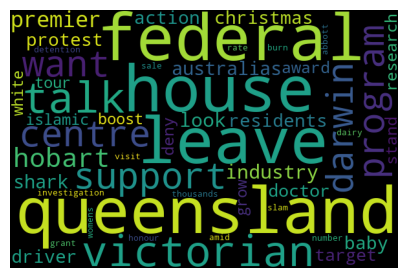

In [106]:
draw_word_cloud(0)

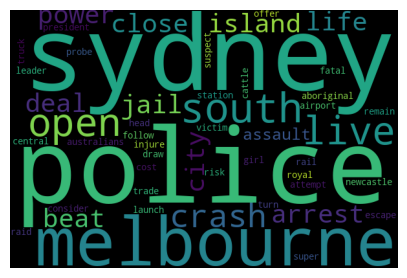

In [108]:
draw_word_cloud(1)

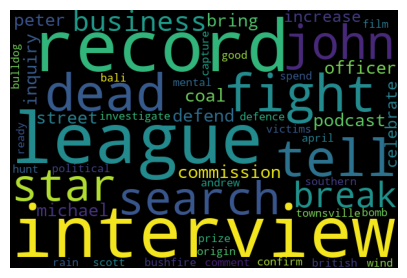

In [109]:
draw_word_cloud(5)